In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#1. Import and store the data in a data frame. (3 points)
df= pd.read_csv('air.dat', sep=' ', header=0, skipinitialspace=True) #still column names are wrong for that do the next step as shown
df.iloc[0,:]=df.columns
df.columns = ['City1' ,'City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare','Low price airline','Market share','price']
df.iloc[0,8]='FL'
df.iloc[0,9]=70.19
df.iloc[0,10]=111.03
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,Market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.4,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69


In [3]:
#2. Remove the outliers from the data (5 points)
df['Average Fare']=pd.to_numeric(df['Average Fare'])
df['Average fare']=pd.to_numeric(df['Average fare'])
df['Distance']=pd.to_numeric(df['Distance'])
df['Average weekly passengers']=pd.to_numeric(df['Average weekly passengers'])
df['market share']=pd.to_numeric(df['market share'])
df['Market share']=pd.to_numeric(df['Market share'])
df['price']=pd.to_numeric(df['price'])

#import seaborn as sns
#sns.boxplot(data=df)
#or
#df.boxplot()
#check the outlier using box-whiskers plot. I think matplotlib box plot provides better visualisation for outliers than seaborn.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print (IQR)
df_withoutoutlier=df[~((df.iloc[:,[2,3,4,6,7,9,10]]< (Q1 - 1.5 * IQR)) |(df.iloc[:,[2,3,4,6,7,9,10]] > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Dataset shape before removal of outlier:',df.shape)
print ('Dataset shape After removal of outlier:',df_withoutoutlier.shape)


Average Fare                  71.410
Distance                     902.000
Average weekly passengers    513.150
market share                  26.960
Average fare                  78.985
Market share                  39.785
price                         54.825
dtype: float64
Dataset shape before removal of outlier: (999, 11)
Dataset shape After removal of outlier: (884, 11)


In [4]:
#3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and split the table
df1 = df.pop('Average Fare')
df['Average Fare']=df1
independent_var=df.iloc[:,:-1]
dependent_var=pd.DataFrame(df.iloc[:,len(df.columns)-1])

In [5]:
#4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
corr_mat=df.corr(method='pearson')
values_less=corr_mat[corr_mat['Average Fare']<0.1]
values=values_less.index.values
independent_var.drop(values,axis=1,inplace=True)
independent_var.head()

,City1,City2,Distance,market leading airline,Average fare,Low price airline,price
0,CAK,ATL,528,FL,111.03,FL,111.03
1,ALB,ATL,852,DL,223.98,CO,167.12
2,ALB,BWI,288,WN,68.86,WN,68.86
3,ALB,ORD,723,UA,161.36,WN,145.42
4,ALB,FLL,1204,WN,137.97,DL,127.69


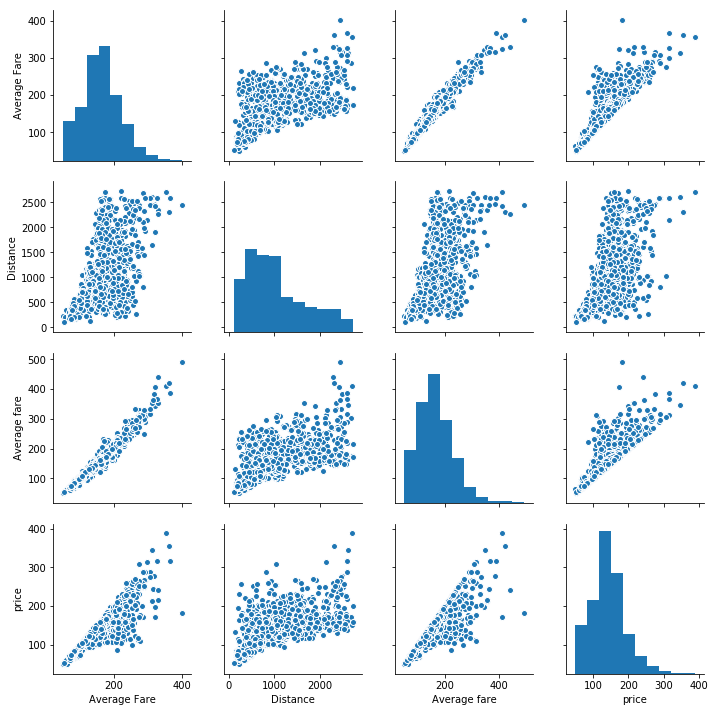

In [10]:
#5. Create scatter Plot of Independent Variable vs Dependent Variable. (4 points)
scatter_mattrix=pd.concat([dependent_var,independent_var],axis=1)
sns.pairplot(scatter_mattrix)

In [17]:
#6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(independent_var.iloc[:,[2,4,6]], dependent_var, test_size=0.2)
print ('X_train {}, y_train {}'.format(X_train,y_train))
print ('--------------------------------------------------------------------------------------------------')
print ('X_test {}, y_test {}'.format(X_test,y_test))

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


X_train      Distance  Average fare   price
119       370         86.65   86.65
542      1180        126.18  119.86
763       921        214.82  201.45
765       746        198.43  198.43
153       277         77.08   77.08
743      2565        147.80  147.80
717      1330        160.74  135.16
294      1005        100.86  100.86
567      1050        122.06  122.06
791       563        102.42  102.42
600      1050        161.35  161.35
616       503        235.97  155.29
152       255         74.26   74.26
969       689        111.80  105.36
245       921        265.45  265.45
277      1521        152.91  118.86
823       950        117.63  114.35
854       180         69.99   69.99
41        594        135.25  132.35
899      2521        257.23  257.23
774      1494        196.48  196.48
686       258         76.03   72.34
29        812        212.59  193.01
621      1783        170.38  170.38
32        712        123.55  110.49
922      2253        273.54  227.69
500      1960       

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
#7. Print the coefficients & intercepts of the linear regression model (5 points)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#Predict the values
print ('Average Fare: ',regr.predict([[1302,236.31 ,211.76]])) #first value
print ('Actual Average Fare:', y_test.values[0])#corresponding First value

Intercept: 
 [11.07973504]
Coefficients: 
 [[0.00242254 0.72925133 0.19720394]]
Average Fare:  [[228.32316866]]
Actual Average Fare: [226.96]
